In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian (simple)

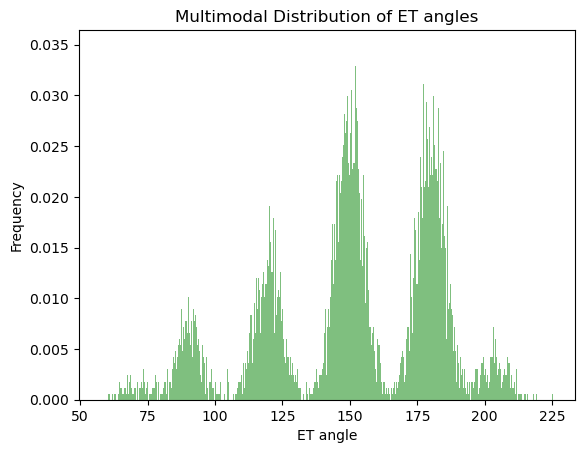

In [41]:
# Define the peaks and their contributions
peaks = np.array([70, 90, 120, 150, 180, 204])
contributions = np.array([0.01666666667, 0.08333333333, 0.175, 0.35, 0.325, 0.05])

# Number of points to generate
num_points = 10000

# Generate the Gaussian multimodal distribution
data = np.array([])
for peak, contribution in zip(peaks, contributions):
    if contribution > 0:
        num_points_peak = int(num_points * contribution)
        data_peak = np.random.normal(loc=peak, scale=5, size=num_points_peak)
        data = np.concatenate((data, data_peak))

plt.hist(data, bins=1000, density=True, alpha=0.5, color='g')
plt.title('Multimodal Distribution of ET angles')
plt.xlabel('ET angle')
plt.ylabel('Frequency')
plt.show()

# von Mises 

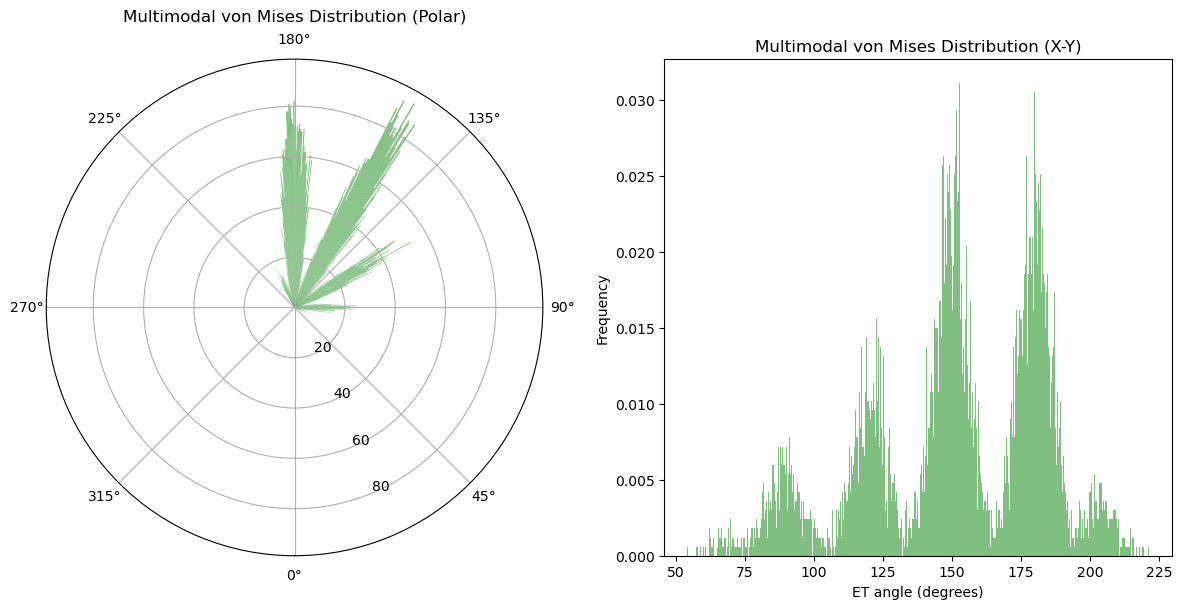

In [3]:
# Function to generate the multimodal von Mises distribution
def generate_von_mises_distribution(peaks, contributions, kappa, num_points):
    data = np.array([])
    for peak, contribution in zip(peaks, contributions):
        if contribution > 0:
            num_points_peak = int(num_points * contribution)
            data_peak = np.random.vonmises(mu=peak, kappa=kappa, size=num_points_peak)
            data = np.concatenate((data, data_peak))
    return data

# Define the peaks (mean directions) and their contributions
peaks = np.array([70, 90, 120, 150, 180, 204])
contributions = np.array([0.01666666667, 0.08333333333, 0.175, 0.35, 0.325, 0.05])
kappa = 90  # Concentration parameter
num_points = 10000

# Convert peaks to radians for circular distribution
peaks = np.deg2rad(peaks)

# Generate the von Mises multimodal distribution
data = generate_von_mises_distribution(peaks, contributions, kappa, num_points)

# Plotting the polar plot with reoriented 0 degrees
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, polar=True)
ax.hist(data, bins=1000, density=False, alpha=0.5, color='g')
ax.set_theta_zero_location('S')  # Set 0 degrees to the bottom
ax.set_title('Multimodal von Mises Distribution (Polar)', va='bottom')

# Convert data back to degrees for X-Y plotting and ensure all angles are positive
data_degrees = (np.rad2deg(data) + 360) % 360

# Plotting the histogram on X-Y plot
ax2 = fig.add_subplot(122)
ax2.hist(data_degrees, bins=1000, density=True, alpha=0.5, color='g')
ax2.set_title('Multimodal von Mises Distribution (X-Y)')
ax2.set_xlabel('ET angle (degrees)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
data_degrees

array([ 74.08998527,  70.72040428,  65.17759561, ..., 203.77177157,
       202.49734896, 210.53468122])

In [5]:
# Export data_degrees as txt file:
np.savetxt("data_degrees.txt", data_degrees, fmt='%f')

In [9]:
np.savetxt("data_rad.txt", data, fmt='%f')

In [10]:
angle_array = np.loadtxt("data_degrees.txt")

In [11]:
angle_array

array([ 74.089985,  70.720404,  65.177596, ..., 203.771772, 202.497349,
       210.534681])